Tutorial: Visualize the indicent field
=================
*01/2021: updated to pyGDM v1.1+*

In this quick tutorial we demonstrate how to visualize fundamental fields without any structure (hence no simulation is done here).

We first load some modules
-------------------

In [1]:
import matplotlib.pyplot as plt

from pyGDM2 import fields
from pyGDM2 import tools
from pyGDM2 import visu

The field generator
--------------------------------------

We will use an *p*-polarized, oblique incident plane wave, which is partially reflected at a thin metallic layer on a thick glass substrate with vacuum above. First we setup the environment to pass to the field generator:

In [2]:
field_generator = fields.plane_wave

## in the new API pyGDM v1.1+, the field-generators take as input the positions 
## to evaluate the field at, the wavelength and a dictionary "env_dict" which 
## contains informations about the environment.
## The parameters depend on the field-generator and need to be also
## supported by the `Dyads` class which is used in combination with the
## field generator. So far all generators and classes support a 3-layer system
## with two semi-infinite layers sourrounding a center medium of finite thickness.
## The supported `env_dict` entries can be found in the documentation of the 
## respective field-generator functions.

## --- layered environment
n3 = 1.0            # vacuum
n2 = 1.05 + 1.8j    # lossy interface layer (metallic)
n1 = 1.5            # dielectric substrate
spacing = 40.0      # thickness of interface layer `n2` (in nm)

env_dict = dict(eps1=n1**2, eps2=n2**2, eps3=n3**2, spacing=spacing)

Setup the test frame and evaluate the field
---------------------------------------------

Now we need to setup the test-frame. 
We use a thin metallic layer (lossy), sandwiched between glass and vacuum.
We want to plot the field in the *XZ* plane.

In [3]:
## --- 2D evaluation plane
projection = 'XZ'
r_probe = tools.generate_NF_map(-500,500,30, -400,600,30,0, projection=projection)

## --- evaluation of the field-generator
wavelength = 500
NF = field_generator(r_probe, env_dict, wavelength, 
                     inc_angle=45, E_s=0, E_p=1)

Plot the result of the field-generator
--------------------------------------------

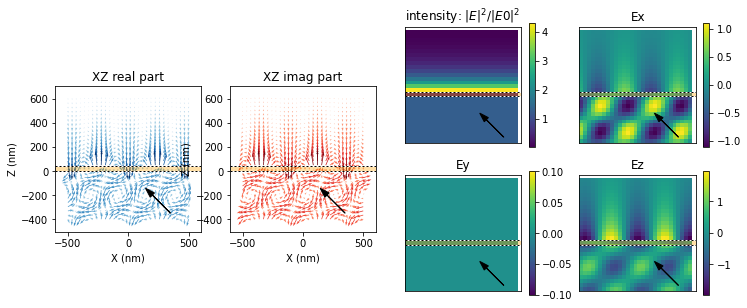

In [4]:
## -- helper function to plot the interface layer
def plot_layer():
    plt.axhline(0, color='w',lw=1); plt.axhline(0, dashes=[2,2], color='k',lw=1)
    plt.axhspan(0,spacing, color='k', ls='--', fc='orange', alpha=0.35)
    plt.axhline(spacing, color='w',lw=1); plt.axhline(spacing, dashes=[2,2], color='k',lw=1)
    plt.arrow(350, -350, -150, 150, head_width=50, head_length=80, fc='k', ec='k')

            


plt.figure(figsize=(12,5))
plt.subplot(141, aspect='equal')
v = visu.vectorfield(NF, r_probe, complex_part='real', projection=projection, tit=projection+' real part', show=0)
plot_layer()

plt.subplot(142, aspect='equal')
v = visu.vectorfield(NF, r_probe, complex_part='imag', cmap=plt.cm.Reds, projection=projection, tit=projection+' imag part',  show=0)
plot_layer()


plt.subplot(243, aspect='equal')
v = visu.vectorfield_color(NF, r_probe, projection=projection, tit='intensity: '+r'$|E|^2/|E0|^2$', show=0)
plt.colorbar(v)
plt.xticks([]); plt.yticks([])
plot_layer()

plt.subplot(244, aspect='equal')
v = visu.vectorfield_color(NF, r_probe, projection=projection, fieldComp='ex', tit='Ex', show=0)
plt.colorbar(v)
plt.xticks([]); plt.yticks([])
plot_layer()

plt.subplot(247, aspect='equal')
v = visu.vectorfield_color(NF, r_probe, projection=projection, fieldComp='ey', tit='Ey', show=0)
plt.colorbar(v)
plt.xticks([]); plt.yticks([])
plot_layer()

plt.subplot(248, aspect='equal')
v = visu.vectorfield_color(NF, r_probe, projection=projection, fieldComp='ez', tit='Ez', show=0)
plt.colorbar(v)
plt.xticks([]); plt.yticks([])
plot_layer()

plt.show()

**Note:** The black arrow indicates the direction and angle of incidence of the plane wave.